<a href="https://colab.research.google.com/github/safal207/hello-world/blob/master/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%B0%D0%B2%D1%82%D0%BE_%D0%BF%D0%BE_%D1%84%D0%BE%D1%82%D0%BE_(3_%D0%BC%D0%B0%D1%80%D0%BA%D0%B8_%D0%B0%D0%B2%D1%82%D0%BE)_%D0%A0%D0%B5%D0%B7%D1%83%D0%BB%D1%8C%D1%82%D0%B0%D1%82_%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C_77_%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist #Загружаем базу mnist
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.keras.datasets import cifar100 #Загружаем базу cifar100

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,GlobalMaxPooling2D,AveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q "/content/drive/My Drive/Базы/Занятие_3/middle_fmr.zip" -d /content/cars #Указываем путь к базе в Google Drive

Found 3086 images belonging to 3 classes.
Found 341 images belonging to 3 classes.


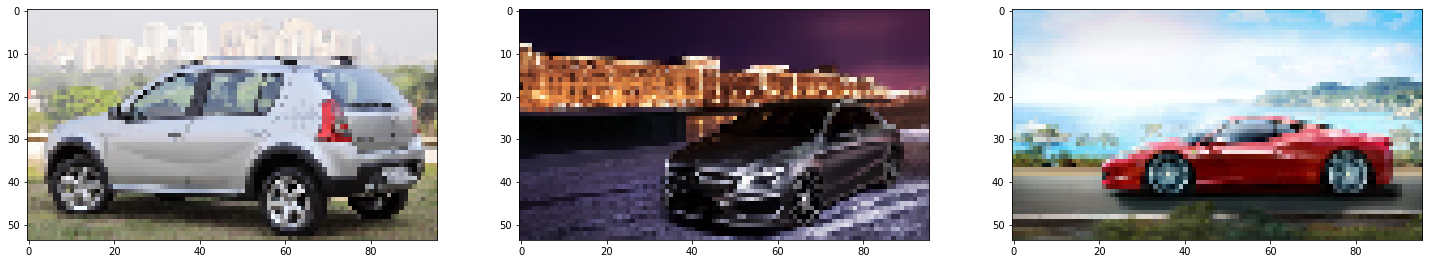

In [ ]:
train_path = '/content/cars' #Папка с папками картинок, рассортированных по категориям
batch_size = 25 #yРазмер выборки
img_width = 96 #Ширина изображения
img_height = 54 #Высота изображения

#Генератор изображений
datagen = ImageDataGenerator(
    rescale=1. / 255, #Значения цвета меняем на дробные показания
    rotation_range=30, #Поворачиваем изображения при генерации выборки
    width_shift_range=0.2, #Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.2, #Двигаем изображения по высоте при генерации выборки
    zoom_range=0.2, #Зумируем изображения при генерации выборки
    horizontal_flip=True, # Включаем отзеркаливание изображений
    fill_mode='nearest', #Заполнение пикселей вне границ ввода
    validation_split=0.1 #Указываем разделение изображений на обучающую и тестовую выборку
)
# обучающая выборка
train_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='training' # устанавливаем как набор для обучения
)

# проверочная выборка
validation_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='validation' # устанавливаем как валидационный набор
)

#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 3, figsize=(25, 5)) #Создаем полотно из 3 графиков
for i in range(3): #Проходим по всем классам
  car_path = train_path + '/' + os.listdir(train_path)[i] + '/'#Формируем путь к выборке
  img_path = car_path + random.choice(os.listdir(car_path)) #Выбираем случайное фото для отображения
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width))) #Отображение фотографии

plt.show() #Показываем изображения

# ЦЕЛЬ (3 марки авто) Точность 80% 

---




Epoch 1/45
123/123 [==============================] - 151s 1s/step - loss: 1.0822 - accuracy: 0.3884 - val_loss: 1.0297 - val_accuracy: 0.3569
Epoch 2/45
123/123 [==============================] - 147s 1s/step - loss: 0.9561 - accuracy: 0.5132 - val_loss: 0.9441 - val_accuracy: 0.5015
Epoch 3/45
123/123 [==============================] - 147s 1s/step - loss: 0.9213 - accuracy: 0.5260 - val_loss: 0.9061 - val_accuracy: 0.5169
Epoch 4/45
123/123 [==============================] - 147s 1s/step - loss: 0.9008 - accuracy: 0.5348 - val_loss: 0.9367 - val_accuracy: 0.5200
Epoch 5/45
123/123 [==============================] - 147s 1s/step - loss: 0.8995 - accuracy: 0.5394 - val_loss: 0.9348 - val_accuracy: 0.5477
Epoch 6/45
123/123 [==============================] - 147s 1s/step - loss: 0.8857 - accuracy: 0.5358 - val_loss: 0.8812 - val_accuracy: 0.5200
Epoch 7/45
123/123 [==============================] - 147s 1s/step - loss: 0.8696 - accuracy: 0.5678 - val_loss: 0.8995 - val_accuracy: 0.5415

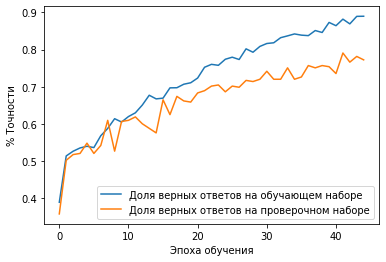

In [ ]:
#Создаем последовательную модель
model = Sequential()
#Первый сверточный слой
model.add(Conv2D(256, (9, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
#Второй сверточный слой
model.add(Conv2D(1256, (3, 9), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#Третий сверточный слой
model.add(Conv2D(256, (9, 3), padding='same', activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.2))
#Четвертый сверточный слой
model.add(Conv2D(256, (3, 9), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#Слой регуляризации Dropout
model.add(Dropout(0.2))
#Пятый сверточный слой
model.add(Conv2D(1512, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(2024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#Слой регуляризации Dropout
model.add(Dropout(0.2))
#Слой преобразования двумерных данных в одномерные 
model.add(Flatten())
#Полносвязный слой
model.add(Dense(2048, activation='relu'))
#Полносвязный слой
model.add(Dense(4096, activation='relu'))
#Вызодной полносвязный слой
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=45,
    verbose=1
)

#Оображаем график точности обучения
#plt.subplot(212)
#plt.title('accuracy')
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('% Точности')


plt.legend()
plt.show()